In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread , imshow
import scipy.ndimage

In [14]:
im= imread("cortex.jpg",as_gray=True)
#im = np.interp(im, [np.min(im), np.max(im)], [0, 255])
#im = scipy.ndimage.filters.gaussian_filter(im, 1)
im=im.astype(np.float)

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_8736\2735435526.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im=im.astype(np.float)


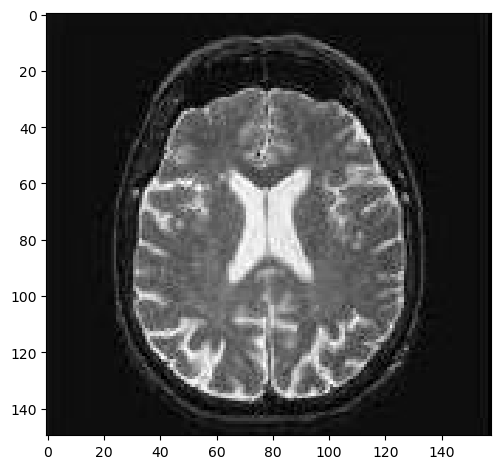

In [15]:
imshow(im)  

In [12]:
r,c=im.shape
print(f"r{r}")
print(f"c{c}")

ValueError: too many values to unpack (expected 2)

In [5]:
phi = np.ones([r,c],dtype=int)
phi[10:r-10,10:c-10]=-1

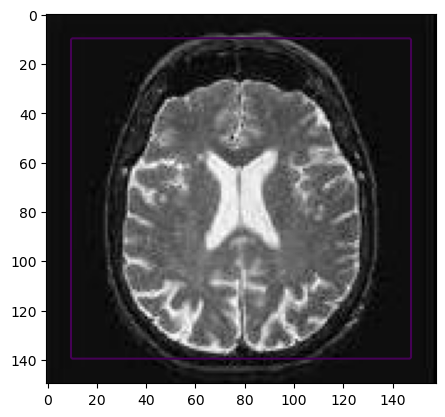

In [17]:
u=-phi
internum=[]
plt.imshow(im,cmap='gray')
plt.contour(u,[0])

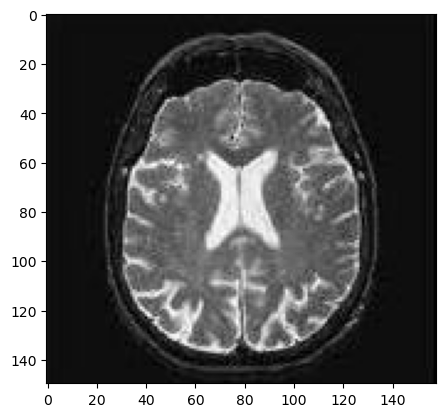

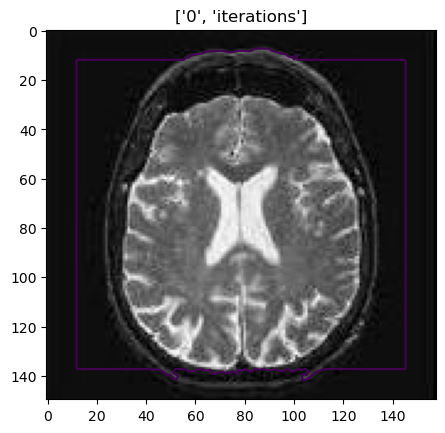

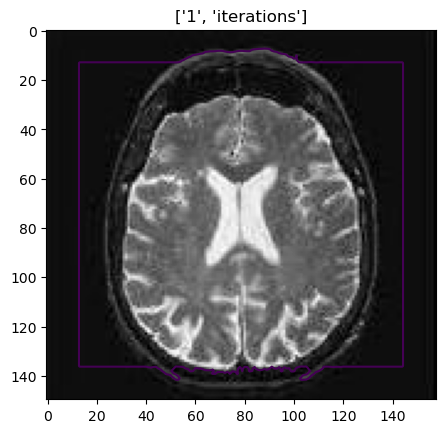

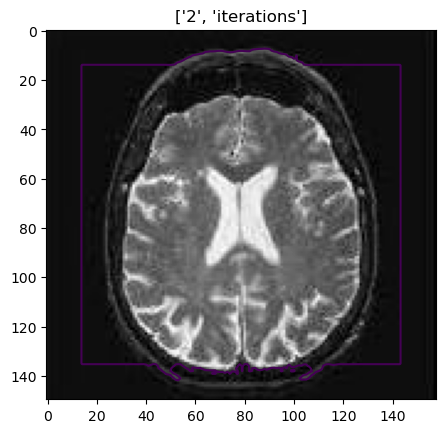

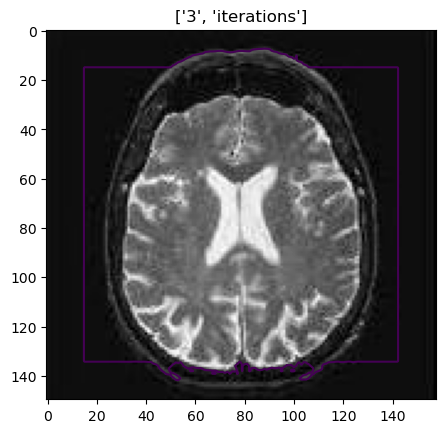

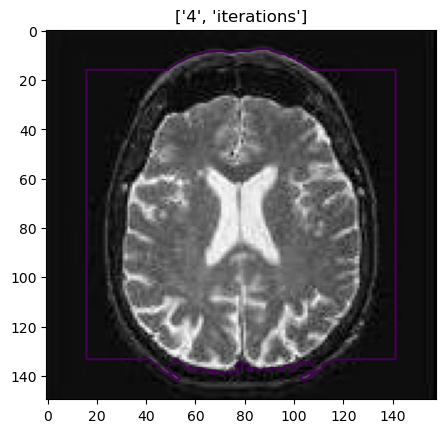

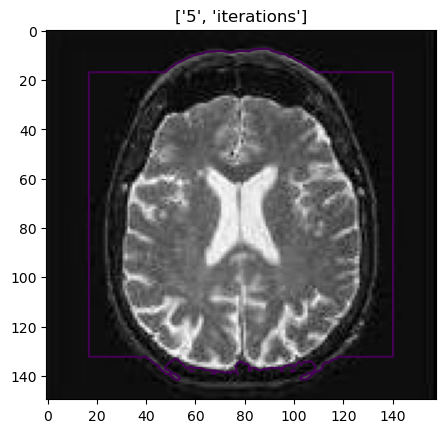

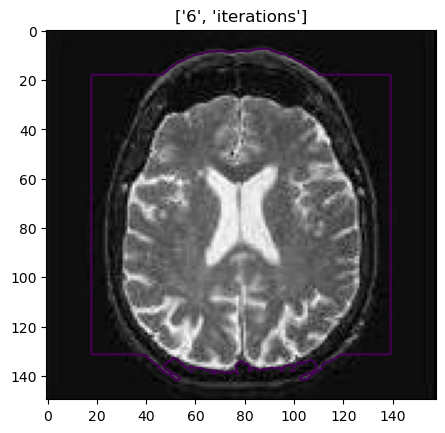

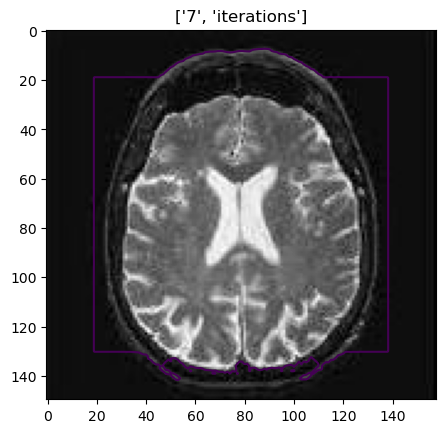

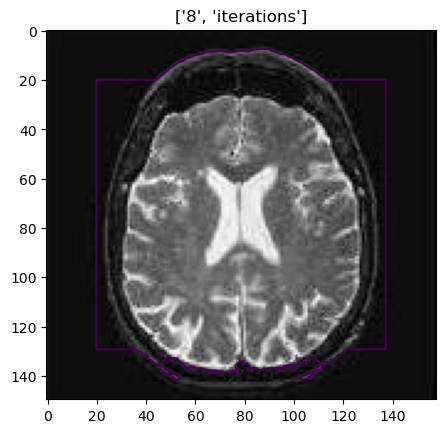

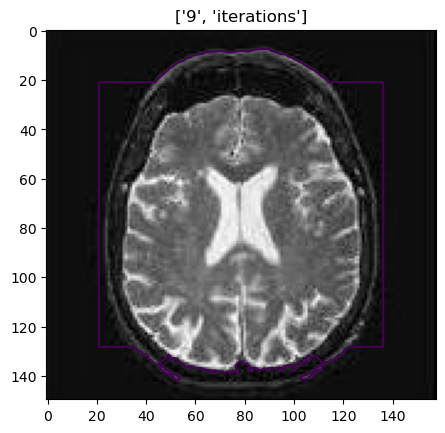

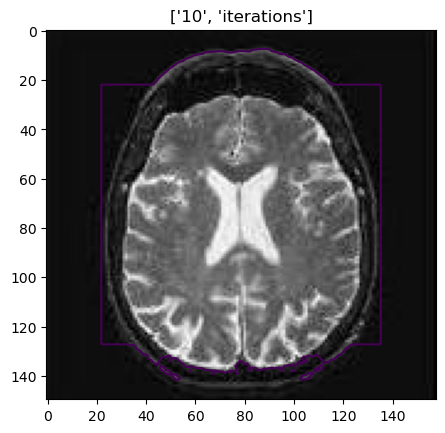

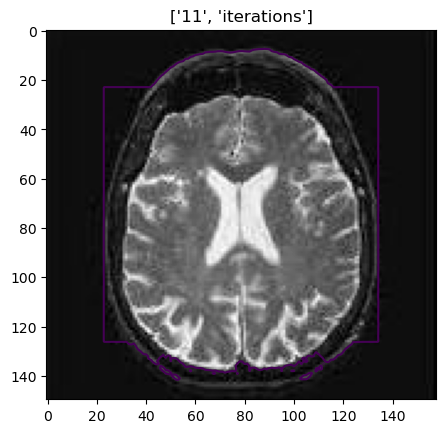

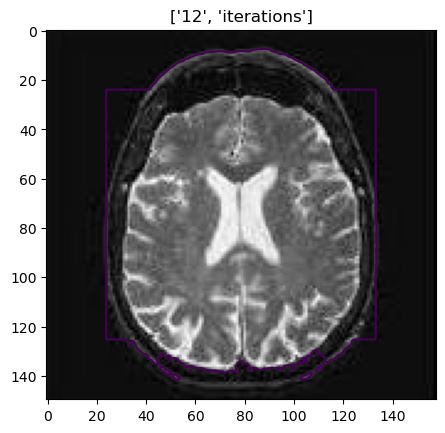

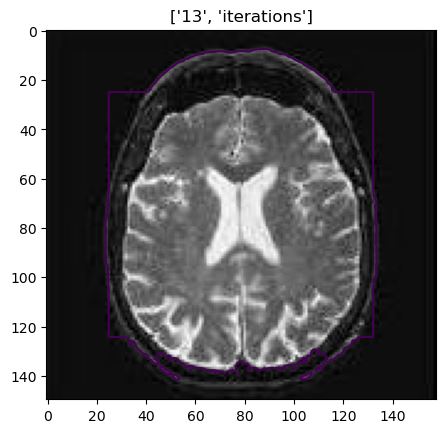

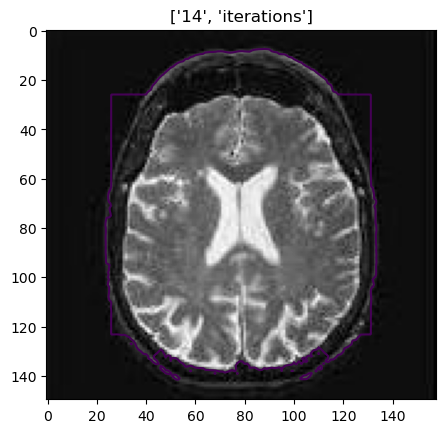

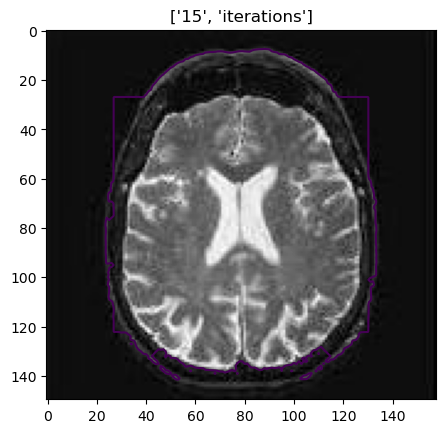

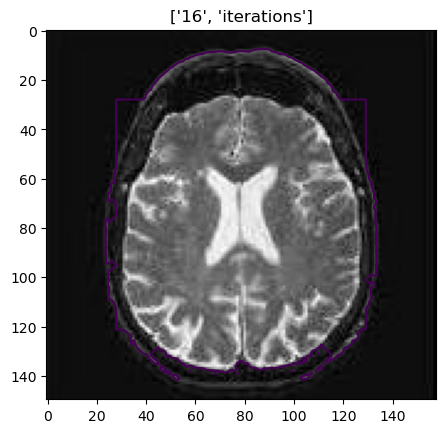

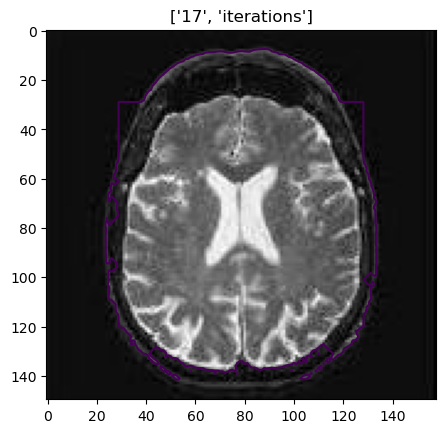

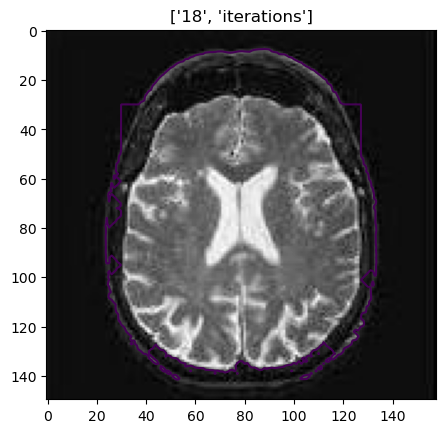

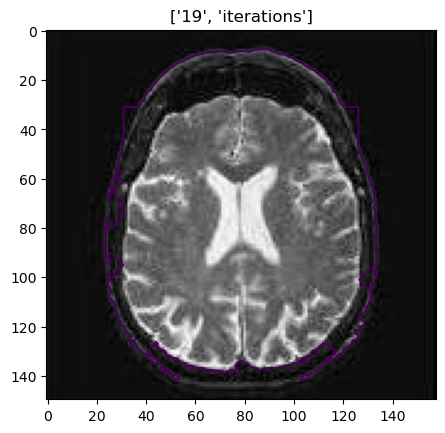

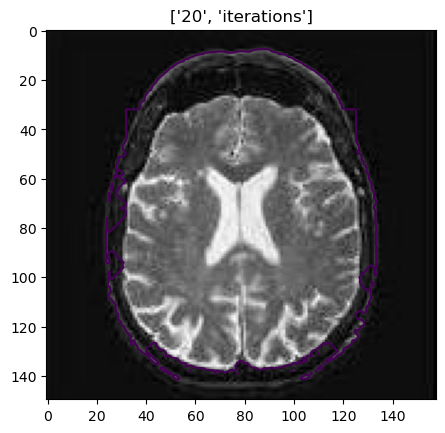

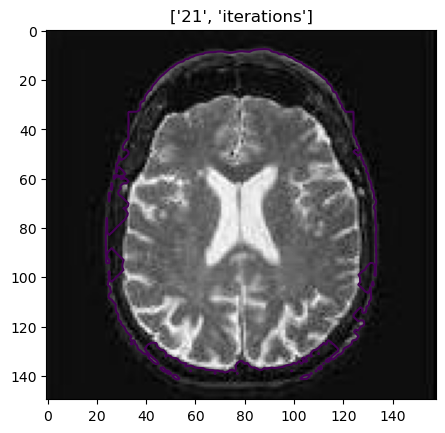

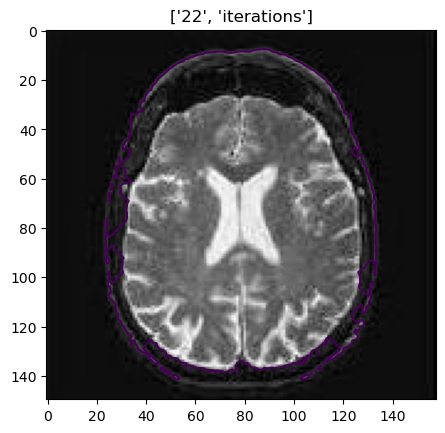

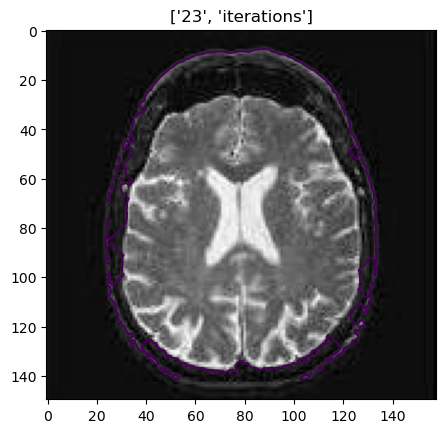

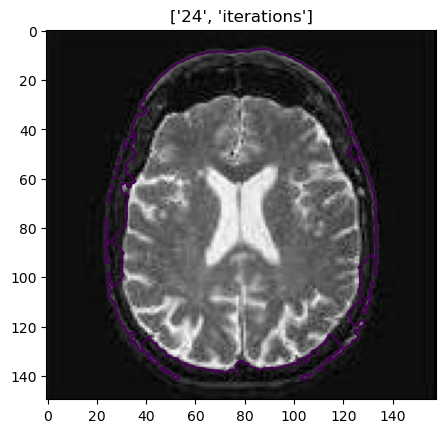

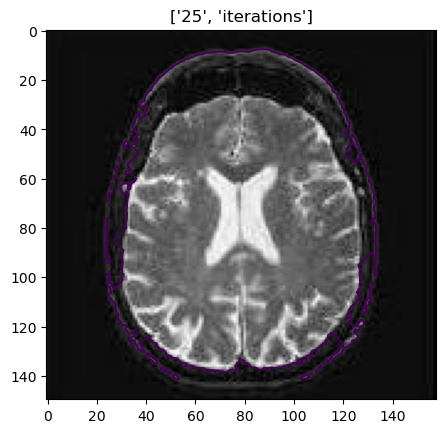

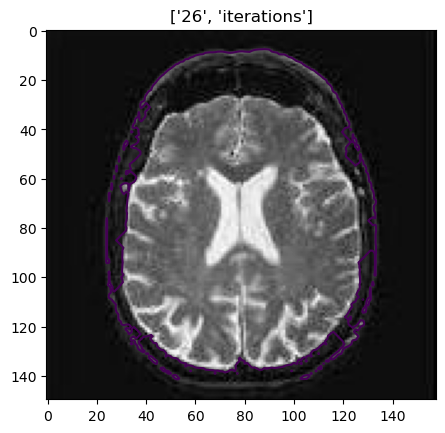

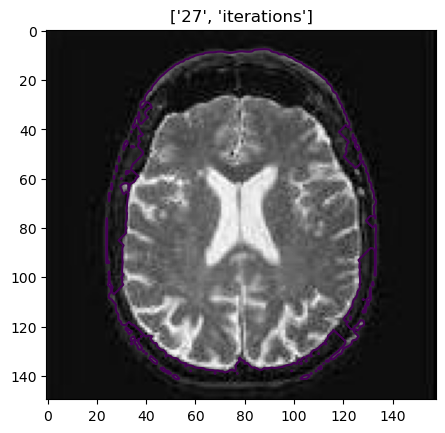

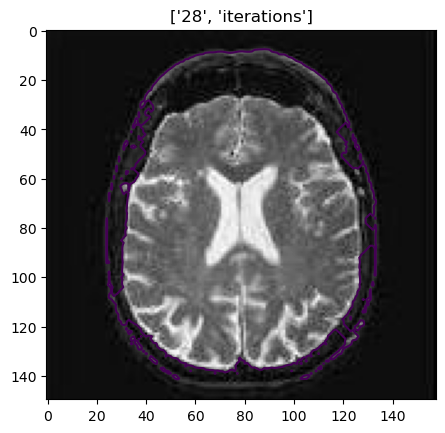

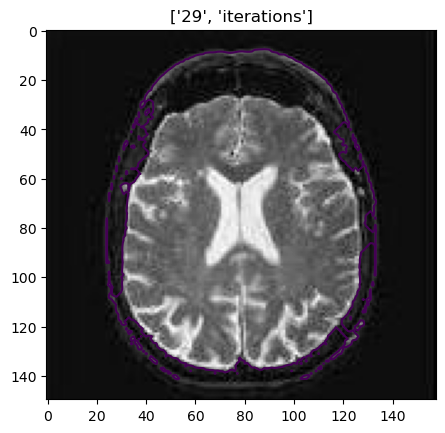

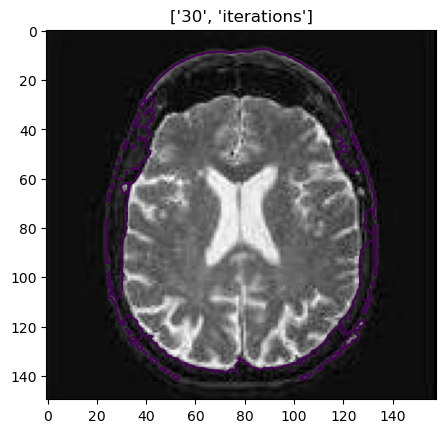

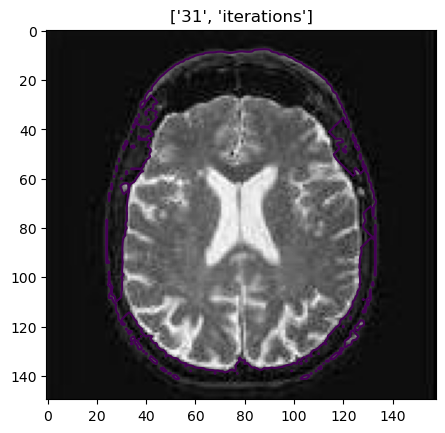

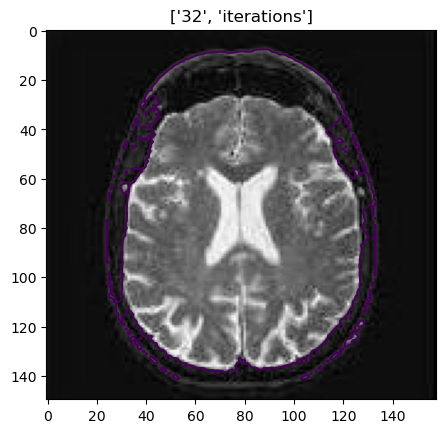

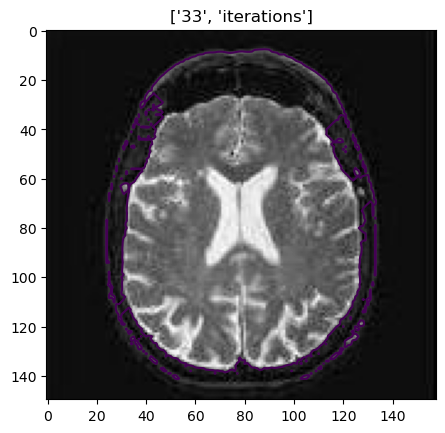

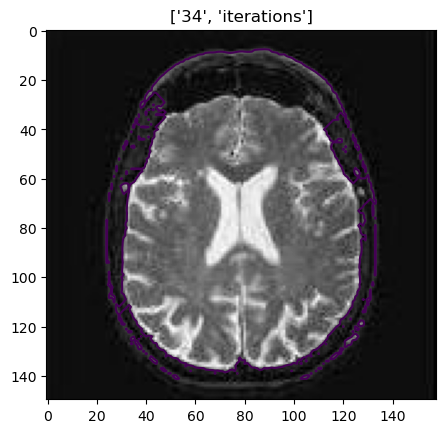

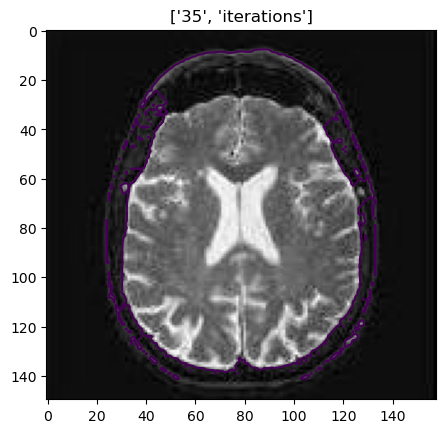

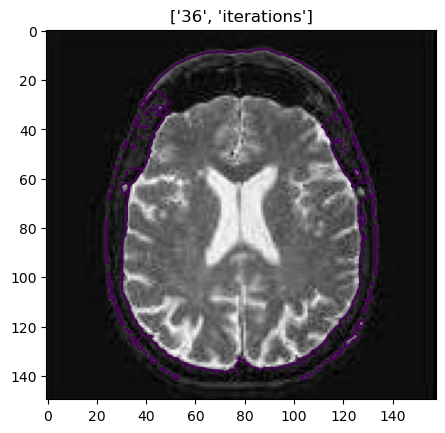

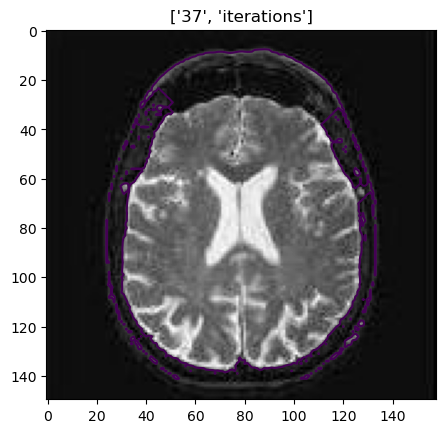

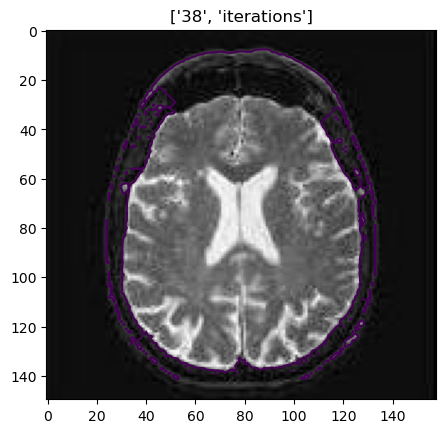

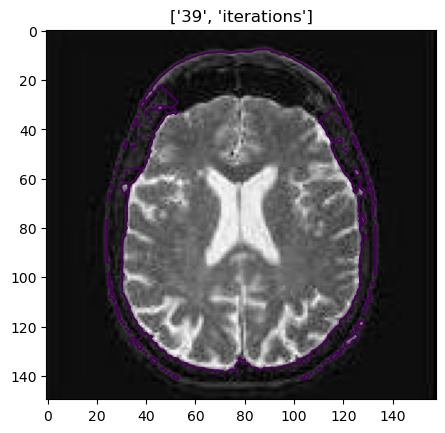

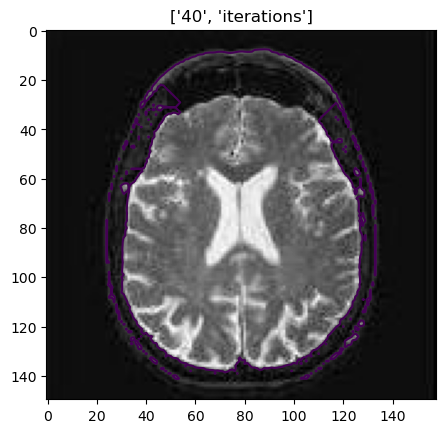

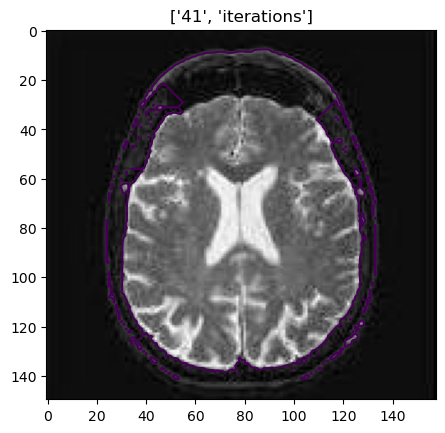

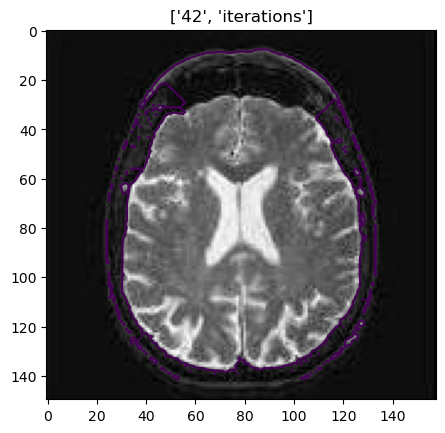

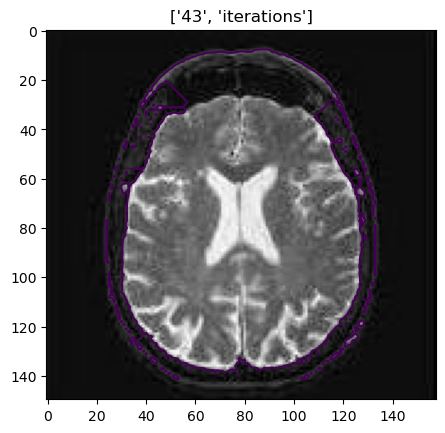

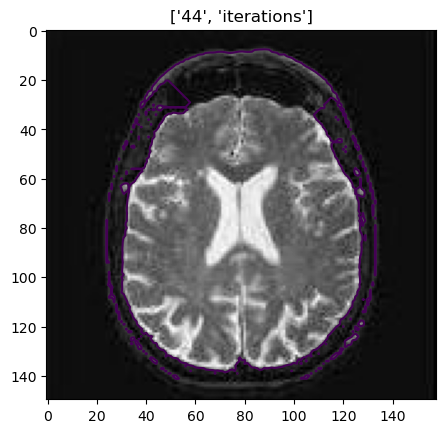

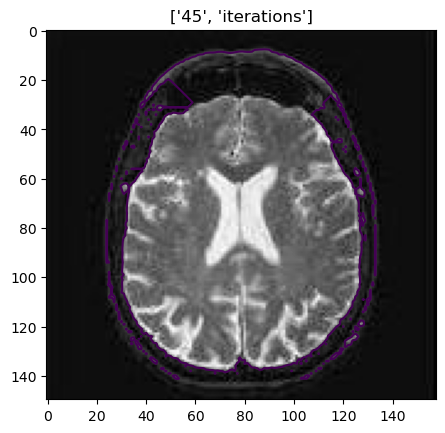

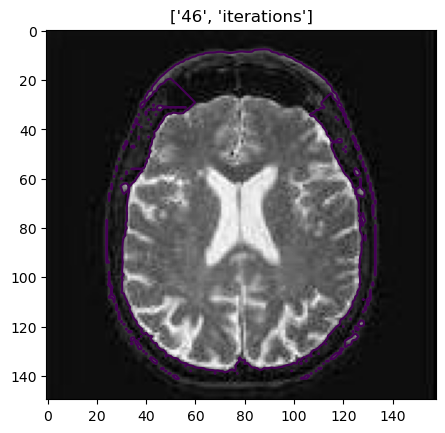

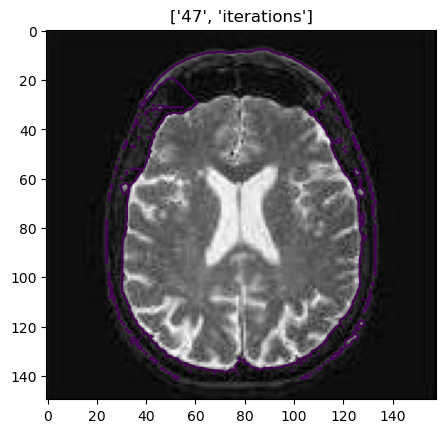

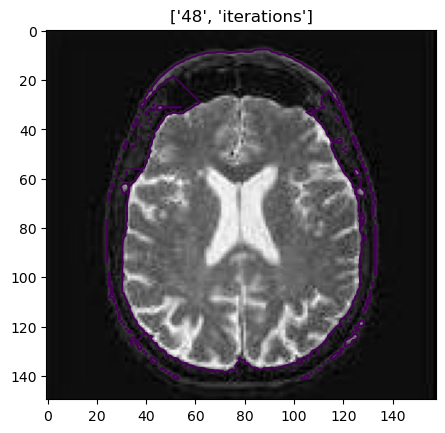

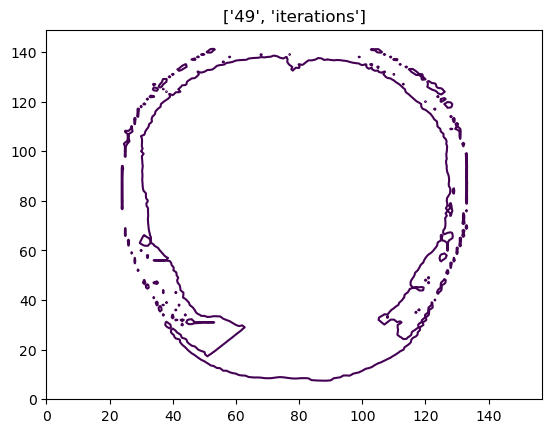

In [20]:
sigma=1;
delt=1;
Iter=50;
mu=25;
iternum=[]
for i in range(Iter):
    u_y, u_x= np.gradient(u)
    c1=np.sum(im*[u<0])/np.sum(u<0)
    c2=np.sum(im*[u>=0])/np.sum(u>=0)
    spf=im-(c1+c2)/2
    spf=spf/np.max(np.abs(spf))
    u=u+delt*(mu*spf*np.sqrt(u_x**2+u_y**2))
    plt.imshow(im,cmap='gray')
    plt.contour(u,[0])
    iternum=[str(i),'iterations'];
    plt.title(iternum)
    plt.pause(0.02)
    u=(((u>=0).astype(int))-((u<0).astype(int)))


In [14]:
mu*spf

array([[-2.99609851, -3.23436318, -3.35349551, ..., -3.83002485,
        -2.51956917, -5.14048052],
       [-2.99609851, -3.23436318, -3.47262785, ..., -3.83002485,
        -2.51956917, -5.14048052],
       [-2.99609851, -3.23436318, -3.47262785, ..., -3.94915718,
        -2.63870151, -5.14048052],
       ...,
       [-2.87696618, -3.59176018, -3.94915718, ..., -2.99609851,
        -3.59176018, -5.37874519],
       [-2.87696618, -3.59176018, -3.94915718, ..., -2.99609851,
        -3.59176018, -5.37874519],
       [-2.87696618, -3.59176018, -3.94915718, ..., -2.99609851,
        -3.59176018, -5.37874519]])

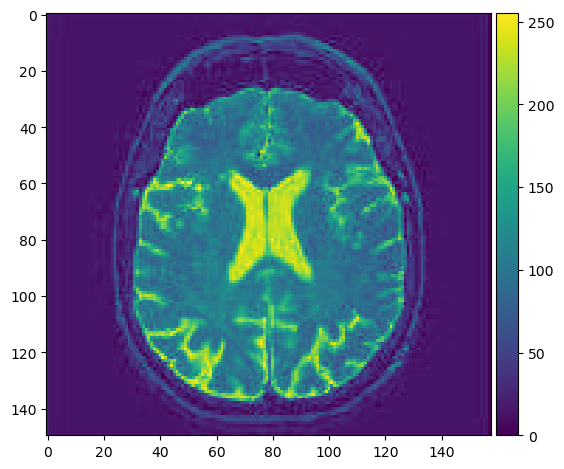

In [15]:
imshow(im)
plt.contour(u,vmax=0, vmin=0)